## Приближение функций 

### Интерполяционный полином в форме Ньютона

_Разделенные разности_

_0-го порядка:_ $\: f(x)$ 

_1-го порядка:_ $\: f(x;x_0) = \frac{f(x) - f(x_0)}{x - x_0}$

_2-го порядка:_ $\: f(x;x_0;x_1) = \frac{f(x;x_0) - f(x_0;x_1)}{x - x_1}$

_k-го порядка:_ $\: f(x;x_0; .. ; x_k) = \frac{f(x;x_0; .. ; x_{k-1}) - f(x_0; .. ; x_k)}{x - x_k}$

Выразим: $\: f(x) = \underbrace{f(x_0)}_{\text{интерп. полином степени 0 в точке } x_0} + \underbrace{(x-x_0)f(x;x_0)}_{\text{остаточный слен интерполяции}}$

Если выразить  $f(x;x_0)$ и подставить в равенство, то получим интерполяционный полином степени 1

_Получим то же самое, что и полином в форме Лагранжа в пределах ошибок округления_

### Построение

Составим табличку:
- по горизонтали порядок $(0, 1, 2, ..)$
- по вертикали узлы $(x_0, x_1, x_2, ..)$


Тогда при добавлении еще одного узла $x_k$ (для повышения степени полинома), нужно будет посчитать диагональные значения таблицы, верхний треугольник останется неизменным

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
import math

Рассматриваем функцию, заданную аналитически:

$$f(x) = sinx \cdot cosx \cdot x^2, \quad  x \in [a,b]$$

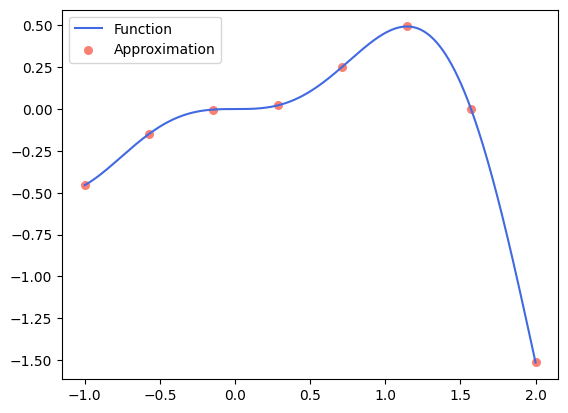

In [9]:
def f(x):
    return np.sin(x)*np.cos(x)*x**2

a, b = -1, 2
m = 7

xx = np.linspace(a, b, m + 1)
yy = f(xx)

def Q(x,y,t):
    n = len(x)
    c = np.zeros((n,n)) # разделенные разности

    c[:,0] = y  # разности 0-го порядка = значения в узлах

    for j in range(1,n): # столбец
        for i in range(n - j): # по строкам диагонально
            c[i][j] = (c[i+1][j-1] - c[i][j-1])/(x[i+j]-x[i])

    Q_n = c[0,0]
    omega = 1

    # собираем полином
    for j in range(1,n):
        omega *= (t -  x[j-1])
        Q_n += c[0,j]*omega

    return Q_n

Q_ = [Q(xx, yy, t) for t in xx]

x_plot = np.linspace(a, b, 1000)
plt.plot(x_plot, f(x_plot), color = 'royalblue', label = 'Function')
plt.scatter(xx, Q_, c = 'salmon', label = 'Approximation', s = 30)
plt.legend() 
plt.show()